# Trabalho Final - Algebra Linear e Aplicações

### Participantes:
#### Jorge Augusto Salgado Salhani
- No. USP: 8927418

#### Driely

## Tema Escolhido: 

## Sistemas Dinâmicos: Solução com autovalores e estabilidade via Jacobiano e Funções de Lyapunov

### Visão Geral

#### Introdução

Sistenas dinâmicos consistem de variáveis que representam alguma entidade que desejamos descrever ao longo do tempo. Como a complexidade de qualquer objeto ou fenômeno físico que desejamos estudar é infinitamente grande no mundo real, precisamos reduzir o número de variáveis para que possamos estudá-lo. A este conjunto de parâmetros reduzidos que descrevem um certo fenômeno damos o nome de modelo.

Por representar a evolução de um fenômeno no tempo, um sistema dinâmico que modelamos pode ser descrito por meio de equações diferenciais. Esta forma de modelagem matemática é bastante visível em sistemas físicos que citamos em sequência.

Podemos considerar uma partícula em movimento retilíneo uniforme. Caso não haja forças atuantes sobre ela, temos

$$
x(t) = x_0 + v_0 t
$$

Por outro lado, caso seja uma partícula em movimento de queda, a equação que a descreve é dada por

$$
x(t) = x_0 + v_0 t + \frac{g t^2}{2}
$$

Onde, para ambas equações, $x_0 = x(t=0)$, $v_0 = v(t=0)$ e $g$ a aceleração da gravidade.

Por trás das equações de movimento acima, respectivamente, valem as seguintes formulações

$$
\frac{d x}{d t} = \dot{x} = v_0 \quad \quad \frac{d x}{d t} = \ddot{x} = \dot{v} = g
$$

Para a primeira, a velocidade é constante. Para a segunda, a aceleração (derivada temporal da velocidade, ou segunda derivada da posição $x$) é constante.

Outras equações diferenciais interessantes são

Sistema massa-mola simples:
$$
m\ddot{x}(t) + k x(t) = 0 \implies x(t) = x_0 + A cos(\sqrt{k/m} t)
$$

Sistema massa-mola amortecido:
$$
m\ddot{x}(t) + b\dot{x}(t) + k x = 0 \implies x(t) = x_0 + A e^{-(b/2m)t}cos(\sqrt{k/m} t)
$$

Equação de Schrodinger (mecânica quântica) simples:
$$
\frac{-\hslash^2}{2m} \frac{d^2 \psi(x)}{d x^2} = E \psi(x) \implies \psi(x) = A sin\Big(\frac{n \pi}{L} x \Big)
$$

Já fica evidente a grande ocorrência de equações diferenciais na representação de modelos físicos. Agora vamos motivar o estudo da estabilidade de sistemas com exemplos mais visuais.

Antes, no entanto, vale a pena mencionar que duas visualizações serão importantes: a evolução temporal de um dado sistema e seu espaço de fase.

A evolução temporal é a representação mais usual, ou seja, para cada instante de tempo $t$ um valor de $x(t)$ é calculado. Já o espaço de fase consiste na representação das variáveis $x(t)$ e sua derivada temporal (velocidade), ou seja $\dot{x}(t)$. A segunda representação será bastante útil para melhores análises da estabilidade do sistema.

Agora podemos verificar dois casos simples porém importantes. Para o caso do pêndulo simples, temos os seguintes resultados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
m = 3
k = 2
c = 1/2

def penduloSimples(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = -y
    return [dydt,dy2dt2]

def penduloAmortecido(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-(c/m)*dydt - (k/m)*y)
    return [dydt,dy2dt2]

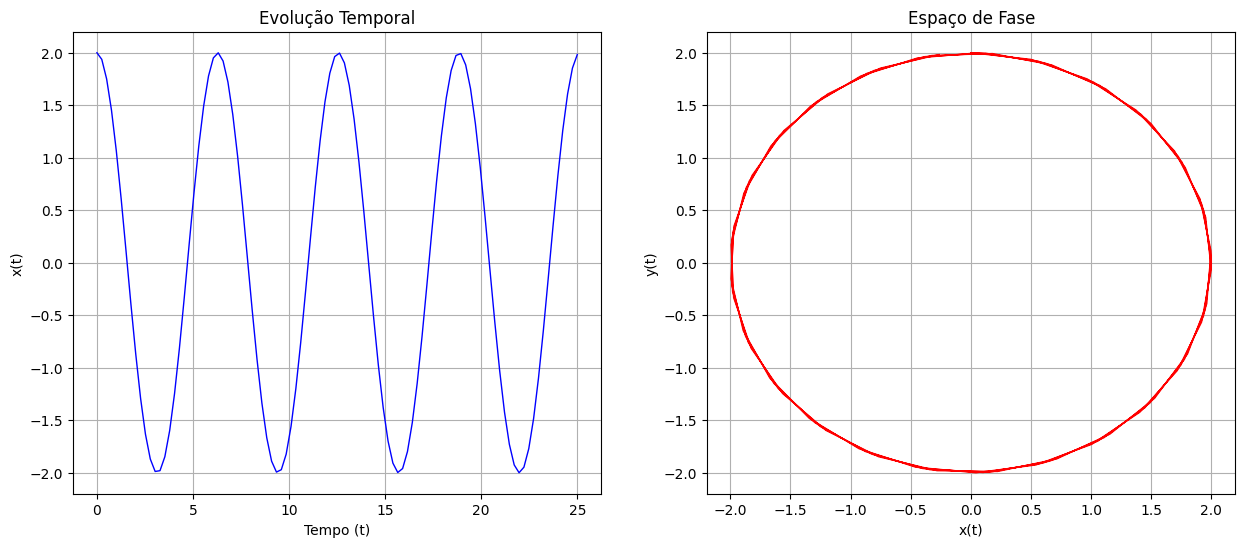

In [6]:
t3 = np.linspace(0,25,100)

PS = odeint(penduloSimples,[0,2],t3)

x3 = PS[:,0]
y3 = PS[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'r-',linewidth=1)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

plt.show()

Já para o pêndulo amortecido, temos os resultados

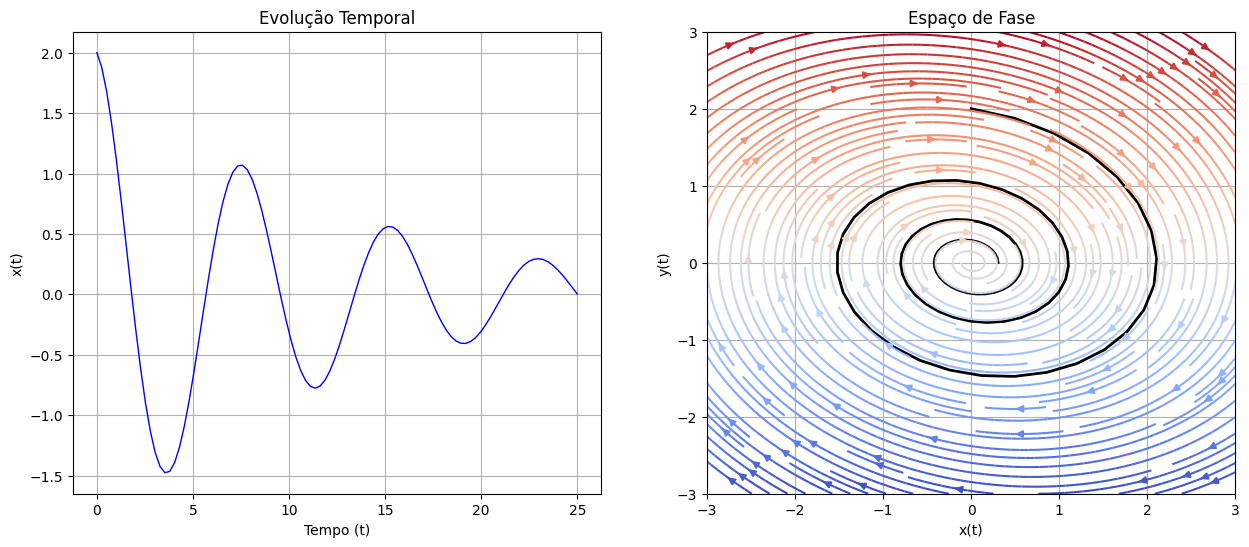

In [7]:
t3 = np.linspace(0,25,100)

PA = odeint(penduloAmortecido,[0,2],t3)

x3 = PA[:,0]
y3 = PA[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'k-',linewidth=2)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = Y
V = (-(k/m)*X - (c/m)*Y)

ax[1].streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')

plt.show()

Fica evidente que ambos apresentam formas de curva distintas, tanto para a evolução temporal quanto para o espaço de fase.

Para o caso simples, o pêndulo oscila indeterminadamente, mantendo a trajetória circular no espaço de fase. Já para o caso amortecido, o pêndulo oscila até parar, fazendo do ponto $[x(t), \dot{x}(t)] = [2,0]$ uma espécie de "dreno", responsável por estabilizar a dinâmica do sistema para um regime estável.

E aqui fica um pouco mais evidente a importância do estudo do tópico escolhido, ou seja, da estabilidade de sistemas dinâmicos. Como saber quais os pontos de estabilidade para sistemas que conehcemos ou não a sua evolução ao longo do tempo?

### Conexão com Álgebra Linear

#### Solução e autovalores

Em primeiro lugar, vamos analisar a solução de sistemas dinâmicos (Sistemas de Equações Diferenciais) e sua conexão com autovalores. Como exemplo, seja a mesma equação para o sistema massa-mola com amortecimento.

$$
m\ddot{x} + c \dot{x} + kx = 0
$$

Se definirmos uma nova variável $y(t) = \dot{x}$ temos que $\dot{y} = \ddot{x}$ e, portanto

$$
\begin{align}
\dot{x} &= y \\
\dot{y} &= \ddot{x} = -\frac{k}{m}x - \frac{c}{m} y
\end{align}
$$

Agora seja $X = [x_1, x_2, ..., x_n]$ variáveis de um sistema dinâmico no espaço $\mathcal{R}^n$. Cada variável está vinculada à sua respectiva taxa de variação no tempo. Assim, $\dot{X} = [\dot{x_1}, \dot{x_2}, ..., \dot{x_n}]$. Logo podemos reescrever as equações acima matricialmente na forma

$$
\left[
\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}
\right] = 

\left[
\begin{array}{cc}
0 & 1 \\
-k/m & -c/m
\end{array}
\right]

\left[
\begin{array}{c}
x \\
y
\end{array}
\right] \leftrightarrow

\dot{X} = A X
$$


Dessa forma, temos uma equação diferencial ordinária de $X$ em relação ao tempo $t$.

Sabemos que equações diferenciais desse tipo $\dot{x} = \lambda x$ apresentam solução $x(t) = C_0 e^{\lambda t}$, portanto podemos assumir uma solução na forma $X = e^{\lambda t} W$ (X e W vetores e W independente de $t$).

Assim $\dot{X} = A X$ pode ser reescrito como

$$
\dot{X} = \lambda e^{\lambda t} W = A e^{\lambda t} W 
$$

que implica em

$$
\lambda W = A W
$$

Essa relação nos indica que, com solução $X = e^{\lambda t} W$ para o sistema, $\lambda$ representa os autovalores da matriz $A$ e $W$ seus autovetores associados.

Para este caso em particular, temos que

$$
det(A - \mathcal{I}\lambda) = 0 
$$

$$
det
\left[
\begin{array}{cc}
-\lambda & 1 \\
-k/m & -c/m -\lambda
\end{array}
\right] = 
\lambda ^2 + \lambda \frac{c}{m} + \frac{k}{m} = 0
$$

representa seu polinômio característico.

Temos, neste caso, 

$$
\lambda_1 = \frac{-c+\sqrt{c^2-4mk}}{2m} \quad \quad \lambda_2=\frac{-c-\sqrt{c^2-4mk}}{2m}
$$

autovalores.

Finalmente, com os autovalores encontrados temos os autovetores $W_1 = [\alpha_1, \alpha_2]^T$ e $W_2 = [\beta_1, \beta_2]^T$ associados tais que a solução para o sistema é dada por

$$
\left[
\begin{array}{c}
x \\
y
\end{array}
\right] = C_1e^{\lambda_1 t} 

\left[
\begin{array}{c}
\alpha_1 \\
\alpha_2
\end{array}
\right]

+ C_2e^{\lambda_2 t}
\left[
\begin{array}{c}
\beta_1 \\
\beta_2
\end{array}
\right]
$$

Com $C_1$ e $C_2$ constantes para $t=0$

Reproduzindo o caso do oscilador amortecido do código exemplo anterior utilizando a formulação por autovalores e autovetores, temos

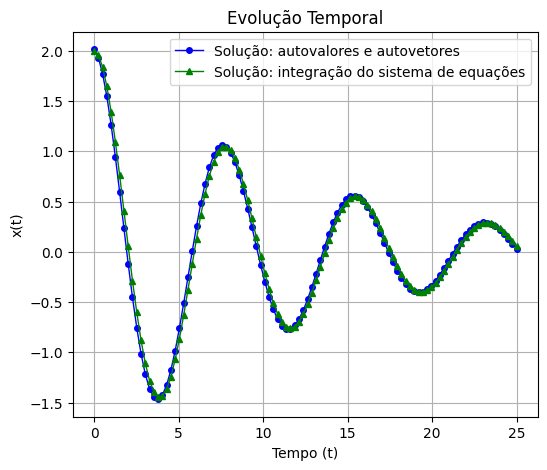

In [168]:
C1 = 0
C2 = 2.6

m = 3
k = 2
c = 1/2

A = np.array([[0, -k/m], [1, -c/m]])

t = np.linspace(0,25,100)

eigenVal, eigenVec = np.linalg.eig(A)

x = [C1 * np.exp(eigenVal[0] * ti) * eigenVec[0] + C2 * np.exp(eigenVal[1] * ti) * eigenVec[1] for ti in t]

plt.subplots(1,1,figsize=(6,5))

PA = odeint(penduloAmortecido,[2,0],t3)

x3 = PA[:,0]

plt.plot(t, np.real(x)[:,0], 'bo-', ms=4, lw=1, label='Solução: autovalores e autovetores')
plt.plot(t, x3, 'g^-', ms=5, lw=1, label='Solução: integração do sistema de equações')
plt.title('Evolução Temporal')
plt.ylabel('x(t)')
plt.xlabel('Tempo (t)')
plt.legend(loc='best')
plt.grid()


Cujos resultados são similares aos obtidos anteriormente.

#### Interpretação de autovalores e autovetores

#### Funções de Lyapunov

Agora seja $V : U \subseteq \mathcal{R}^n \to \mathcal{R}$ contínua e diferenciável ao longo do campo vetorial definido por $\dot{X}$. Assim, podemos definir a seguinte operação com $V$

$$
\dot{V}(X(t)) = \frac{\partial V}{\partial x_1} \dot{x}_1(t) + \frac{\partial V}{\partial x_2} \dot{x}_2(t) + ... + \frac{\partial V}{\partial x_n} \dot{x}_n(t)
$$

Ao definirmos a notação $\partial f/\partial x$ como $\partial _x f$ e também o operador  gradiente $\nabla$ tal que $\nabla = [\partial _{x_1}, \partial _{x_2}, ... \partial _{x_n}]$, então

$$
\dot{V}(X(t)) = 
\Big[\partial _{x_1} V, \partial _{x_2} V, ..., \partial _{x_n} V\Big]
\cdot
\left[
\begin{array}{c}
\dot{x}_1 \\
\dot{x}_2 \\
... \\
\dot{x}_n \\
\end{array}
\right]

= \nabla V \cdot \dot{X}(t)
$$

O problema torna, agora, o de encontrar uma função $V$ vinculada ao sistema dinâmico em estudo

Primeiro vamos usar de exemplo o sistema dinâmico:

$$
\dot{x} = y + x - x(x^2 + y^2) \\
\dot{y} = -x + y - y(x^2 + y^2)
$$


In [2]:
def Exemplo1(X, t=0):
    x = X[0]
    y = X[1]

    dxdt = y + x - x * (x**2 + y**2)
    dydt = -x + y - y * (x**2 + y**2)
    
    return [dxdt, dydt]

def Exemplo2(X, t=0):
    x = X[0]
    y = X[1]

    dxdt = 2*x - x**2 - x*y
    dydt = - y + x*y 
    
    return [dxdt, dydt]

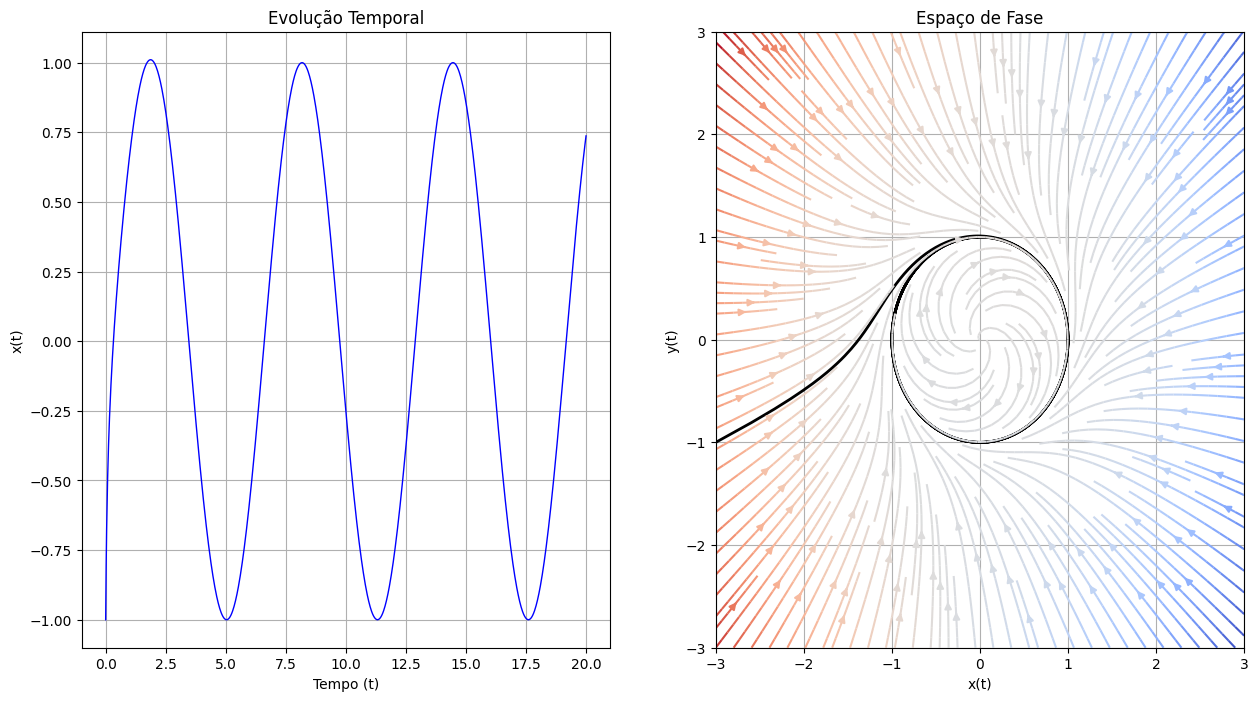

In [4]:
t = np.linspace(0, 20,  1000)

EX1 = odeint(Exemplo1, [-3,-1], t)

x = EX1[:,0]
y = EX1[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(t,y,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x,y,'k-',linewidth=2)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = Y + X - X * (X**2 + Y**2)
V = -X + Y - Y * (X**2 + Y**2)

ax[1].streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')

plt.show()

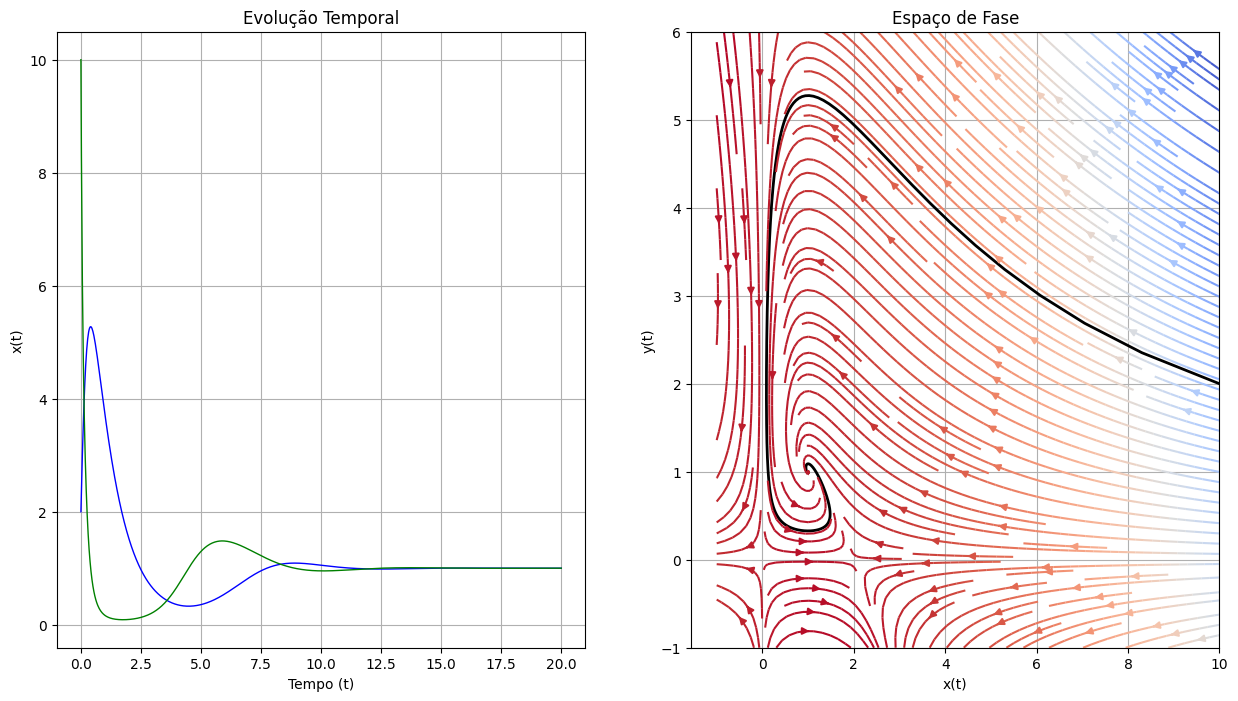

In [12]:
EX1 = odeint(Exemplo2, [10, 2], t)

x = EX1[:,0]
y = EX1[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(t,y,'b-',linewidth=1)
ax[0].plot(t,x,'g-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x,y,'k-',linewidth=2)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

Y, X = np.mgrid[-1:6:100j, -1:10:100j]
U = 2*X - X**2 - X*Y
V = -Y + X*Y 

ax[1].streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')

plt.show()

### Problemas em Exemplo